In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("C:/Users/onkar/Downloads/Assignment/Assignment/Project - 3&4_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups.csv")
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = data.copy()
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print("Missing data In dataset :\n",df.isnull().sum())

Missing data In dataset :
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [5]:
print("Summary of data: \n",df.describe())

Summary of data: 
            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


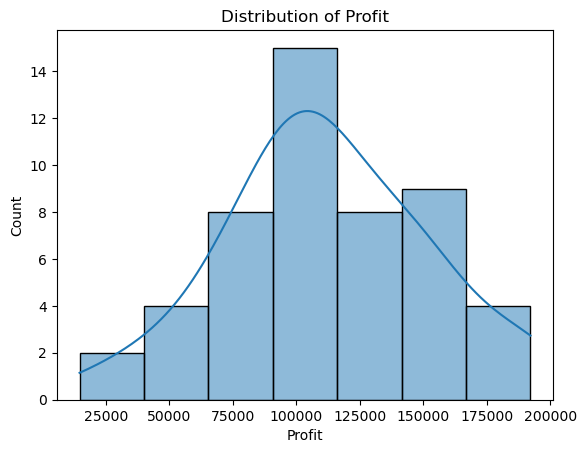

In [6]:
sns.histplot(df['Profit'],kde = True)
plt.title('Distribution of Profit')
plt.savefig('graphs/profit_distributionPRJ2.png')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


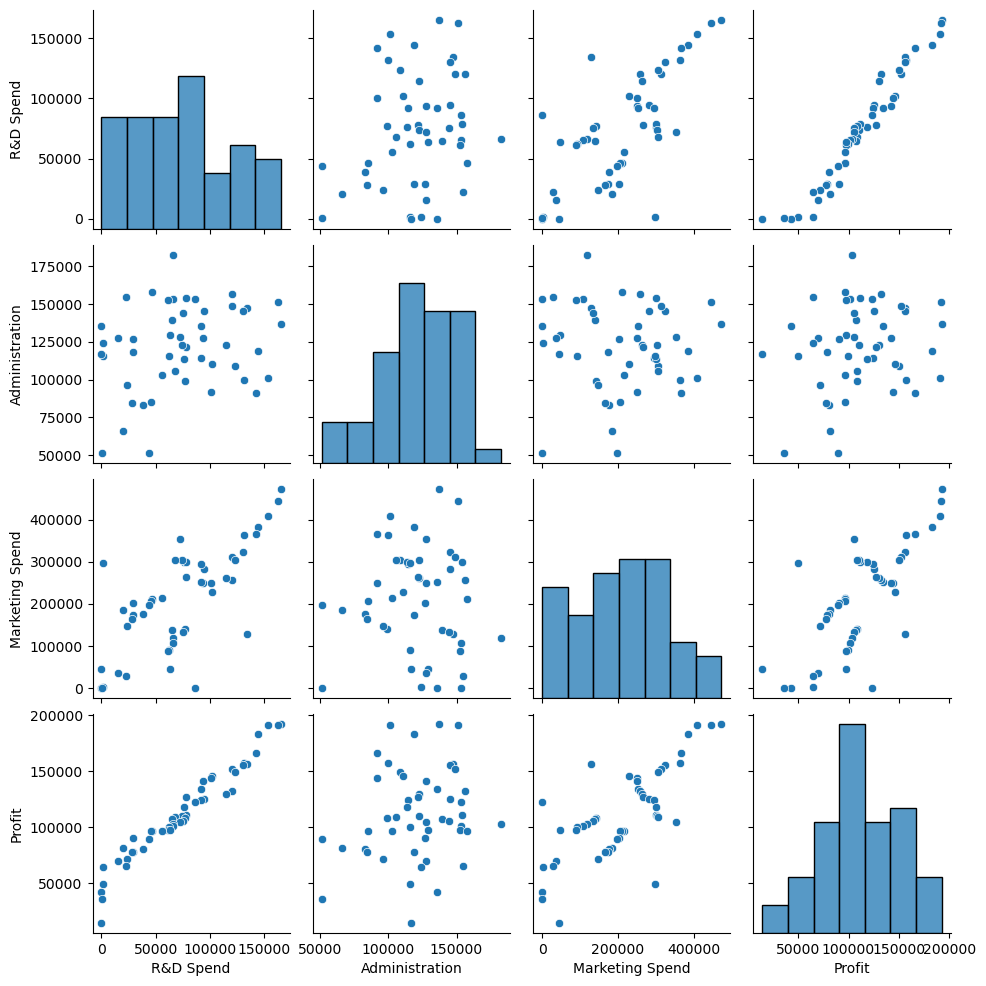

In [7]:
sns.pairplot(df)
plt.savefig('graphs/pairplotPRJ2.png')
plt.show()

### Data Processing

In [8]:
print("Encoding catagorical veriable 'State'... ")
categorical_features = ['State']
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
X = df.drop('Profit', axis = 1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

Encoding catagorical veriable 'State'... 


### Training of model

In [9]:
pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

print("Training set performance:")
print(f"R^2: {r2_score(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

print("Testing set performance:")
print(f"R^2: {r2_score(y_test, y_pred_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

Training set performance:
R^2: 0.9537
RMSE: 8927.4890
Testing set performance:
R^2: 0.8987
RMSE: 9055.9573


### Model selection

In [11]:
results = pd.DataFrame(columns=['Model', 'Train R^2', 'Test R^2'])

linear_regression_results = {
    'Model': 'Linear Regression',
    'Train R^2': r2_score(y_train, y_pred_train),
    'Test R^2': r2_score(y_test, y_pred_test)}

linear_regression_results_df = pd.DataFrame([linear_regression_results])

results = pd.concat([results, linear_regression_results_df], ignore_index=True)

print("Model comparison table:")
print(results)

Model comparison table:
               Model  Train R^2  Test R^2
0  Linear Regression   0.953702  0.898727
